In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Setting a default seaborn setting in plots
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [1]:
#importing libraries


In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('cars.csv')

In [4]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [5]:
#the dataset contain 4340 rows and 8 columns

In [6]:
data.describe()#describing numeric fields

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt

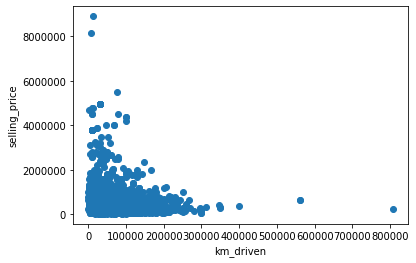

In [9]:
plt.scatter(data['km_driven'],data['selling_price'])
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

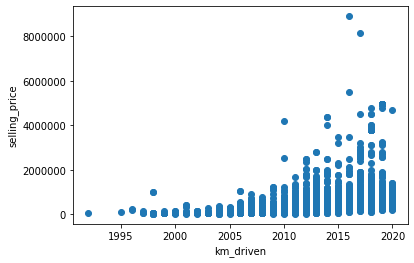

In [10]:
plt.scatter(data['year'],data['selling_price'])
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

In [11]:
#year increases selling price also increases

In [12]:
data.shape

(4340, 8)

In [13]:
#there are 4340 columns and 8 rows

In [14]:
data['km_driven'].unique()

array([ 70000,  50000, 100000,  46000, 141000, 125000,  25000,  60000,
        78000,  35000,  24000,   5000,  33000,  28000,  59000,   4500,
       175900,  14500,  15000,  33800, 130400,  80000,  10000, 119000,
        75800,  40000,  74000,  64000, 120000,  79000,  18500,  10200,
        29000,  90000,  73300,  92000,  66764, 350000, 230000,  31000,
        39000, 166000, 110000,  54000,  63000,  76000,  11958,  20000,
         9000,   6500,  58000,  62200,  34000,  53000,  49000,  63500,
         9800,  13000,  21000,  29173,  48000,  30000,  87000,  16000,
        79350,  81000,   3600,  14272,  49213,  57000,   3240, 114000,
        53772, 140000, 175000,  36000, 155500,  23000,  22155,  78380,
       150000,  80362,  55000,   1136,  43000,   2650, 115962,  65000,
        56000, 213000, 139000, 160000, 163000,  32000,  52000,  11240,
        66000,  26500,  72000,  44000, 130000, 195000, 155000,   4000,
        41000,  10832,  14681,  51000, 200000,  19600,  46730,  21170,
      

In [15]:
data['km_driven'].value_counts()

70000     236
80000     228
50000     222
120000    220
60000     215
         ... 
80577       1
49834       1
19107       1
13270       1
22255       1
Name: km_driven, Length: 770, dtype: int64

In [16]:
#the unique values of categorical features

In [17]:
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [18]:
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [19]:
data['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [20]:
data['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [21]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [22]:
#checking any null values in data

In [23]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [24]:
#there is no  null values in dataset

In [25]:
data['selling_price'].describe()

count    4.340000e+03
mean     5.041273e+05
std      5.785487e+05
min      2.000000e+04
25%      2.087498e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

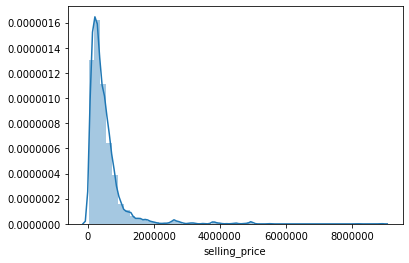

In [27]:
sns.distplot(data.selling_price)

In [28]:
data['selling_price'].unique()

array([  60000,  135000,  600000,  250000,  450000,  140000,  550000,
        240000,  850000,  365000,  260000, 1650000,  585000, 1195000,
        390000, 1964999, 1425000,  975000, 1190000,  930000,  525000,
       1735000, 1375000,  900000, 1300000, 1400000,  229999, 1550000,
       1250000,  625000, 1050000,  560000,  290000,  275000,  411000,
        150000,  500000,  100000,  725000,  401000,  750000,  310000,
        665000,  465000,  160000,  675000,  300000,   70000,  151000,
        280000,  350000,  570000,  125000,  130000,  925000,  200000,
        248000,   80000,  650000,  495000,  371000, 1025000, 8150000,
        325000, 1470000, 2800000,  210000, 1150000, 4500000, 2750000,
       1975000,  175000, 2500000,  628000,  399000,  315000,  780000,
        434000,  690000,  555000,  120000,  165000,   95000,  800000,
        840000,  490000,  400000, 1000000,  530000,   40000,   75000,
        540000,  700000,  430000,   65000,  195000,  170000,  225000,
         99000,  620

In [29]:
data['fuel'].describe()

count       4340
unique         5
top       Diesel
freq        2153
Name: fuel, dtype: object

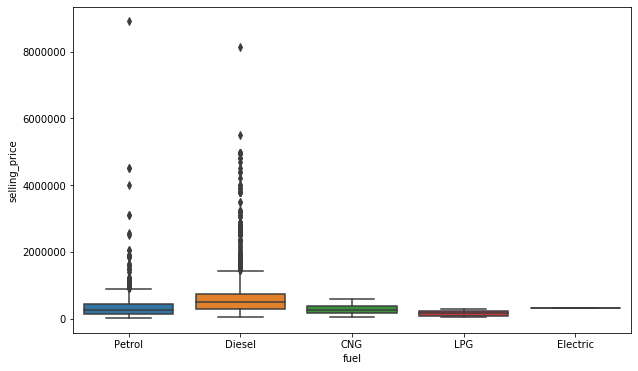

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fuel',y='selling_price',data=data)
plt.show()

In [31]:
#the selling price of diesel is higher than others

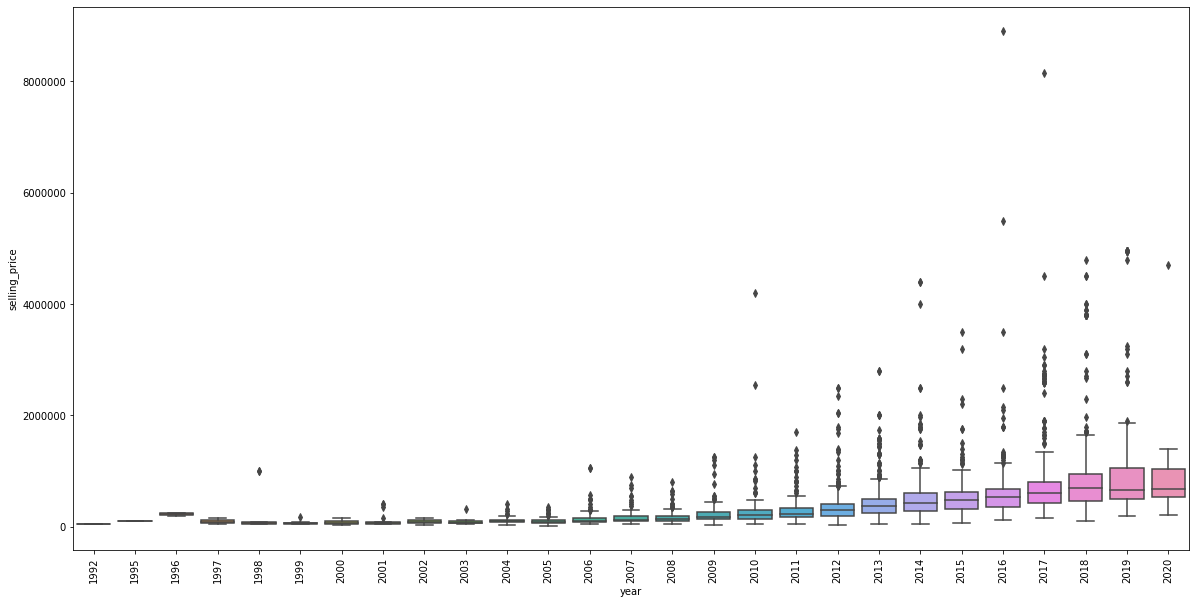

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x='year',y='selling_price',data=data)
plt.xticks(rotation=90)#rotate values
plt.show()

In [33]:
#selling price of newest is high compared to old ones.

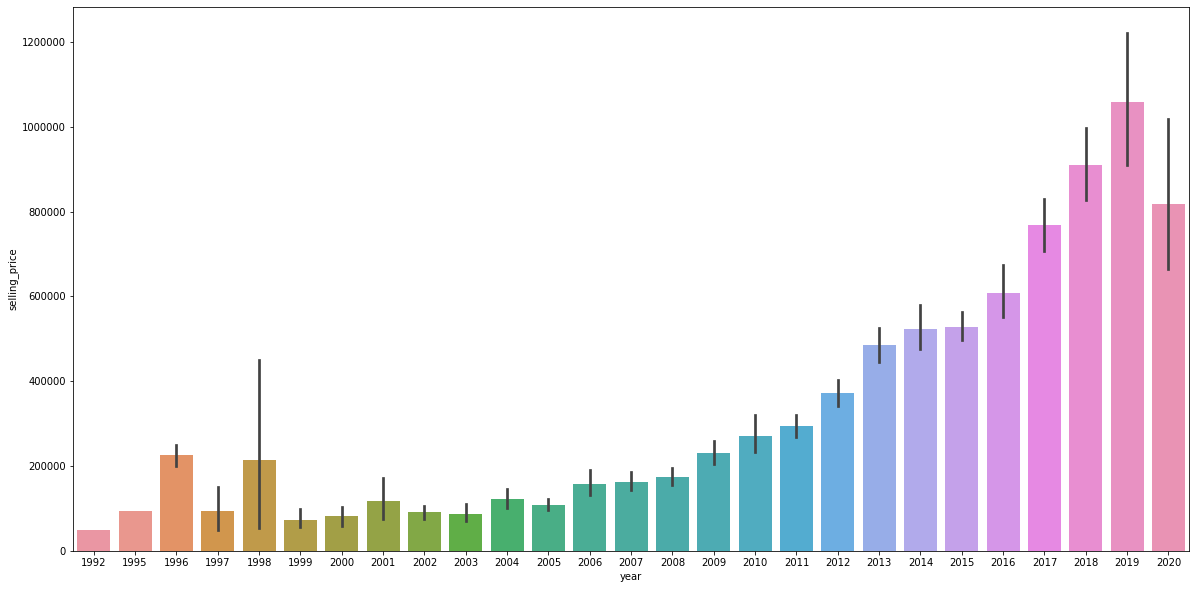

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x='year',y='selling_price',data=data)
plt.show()

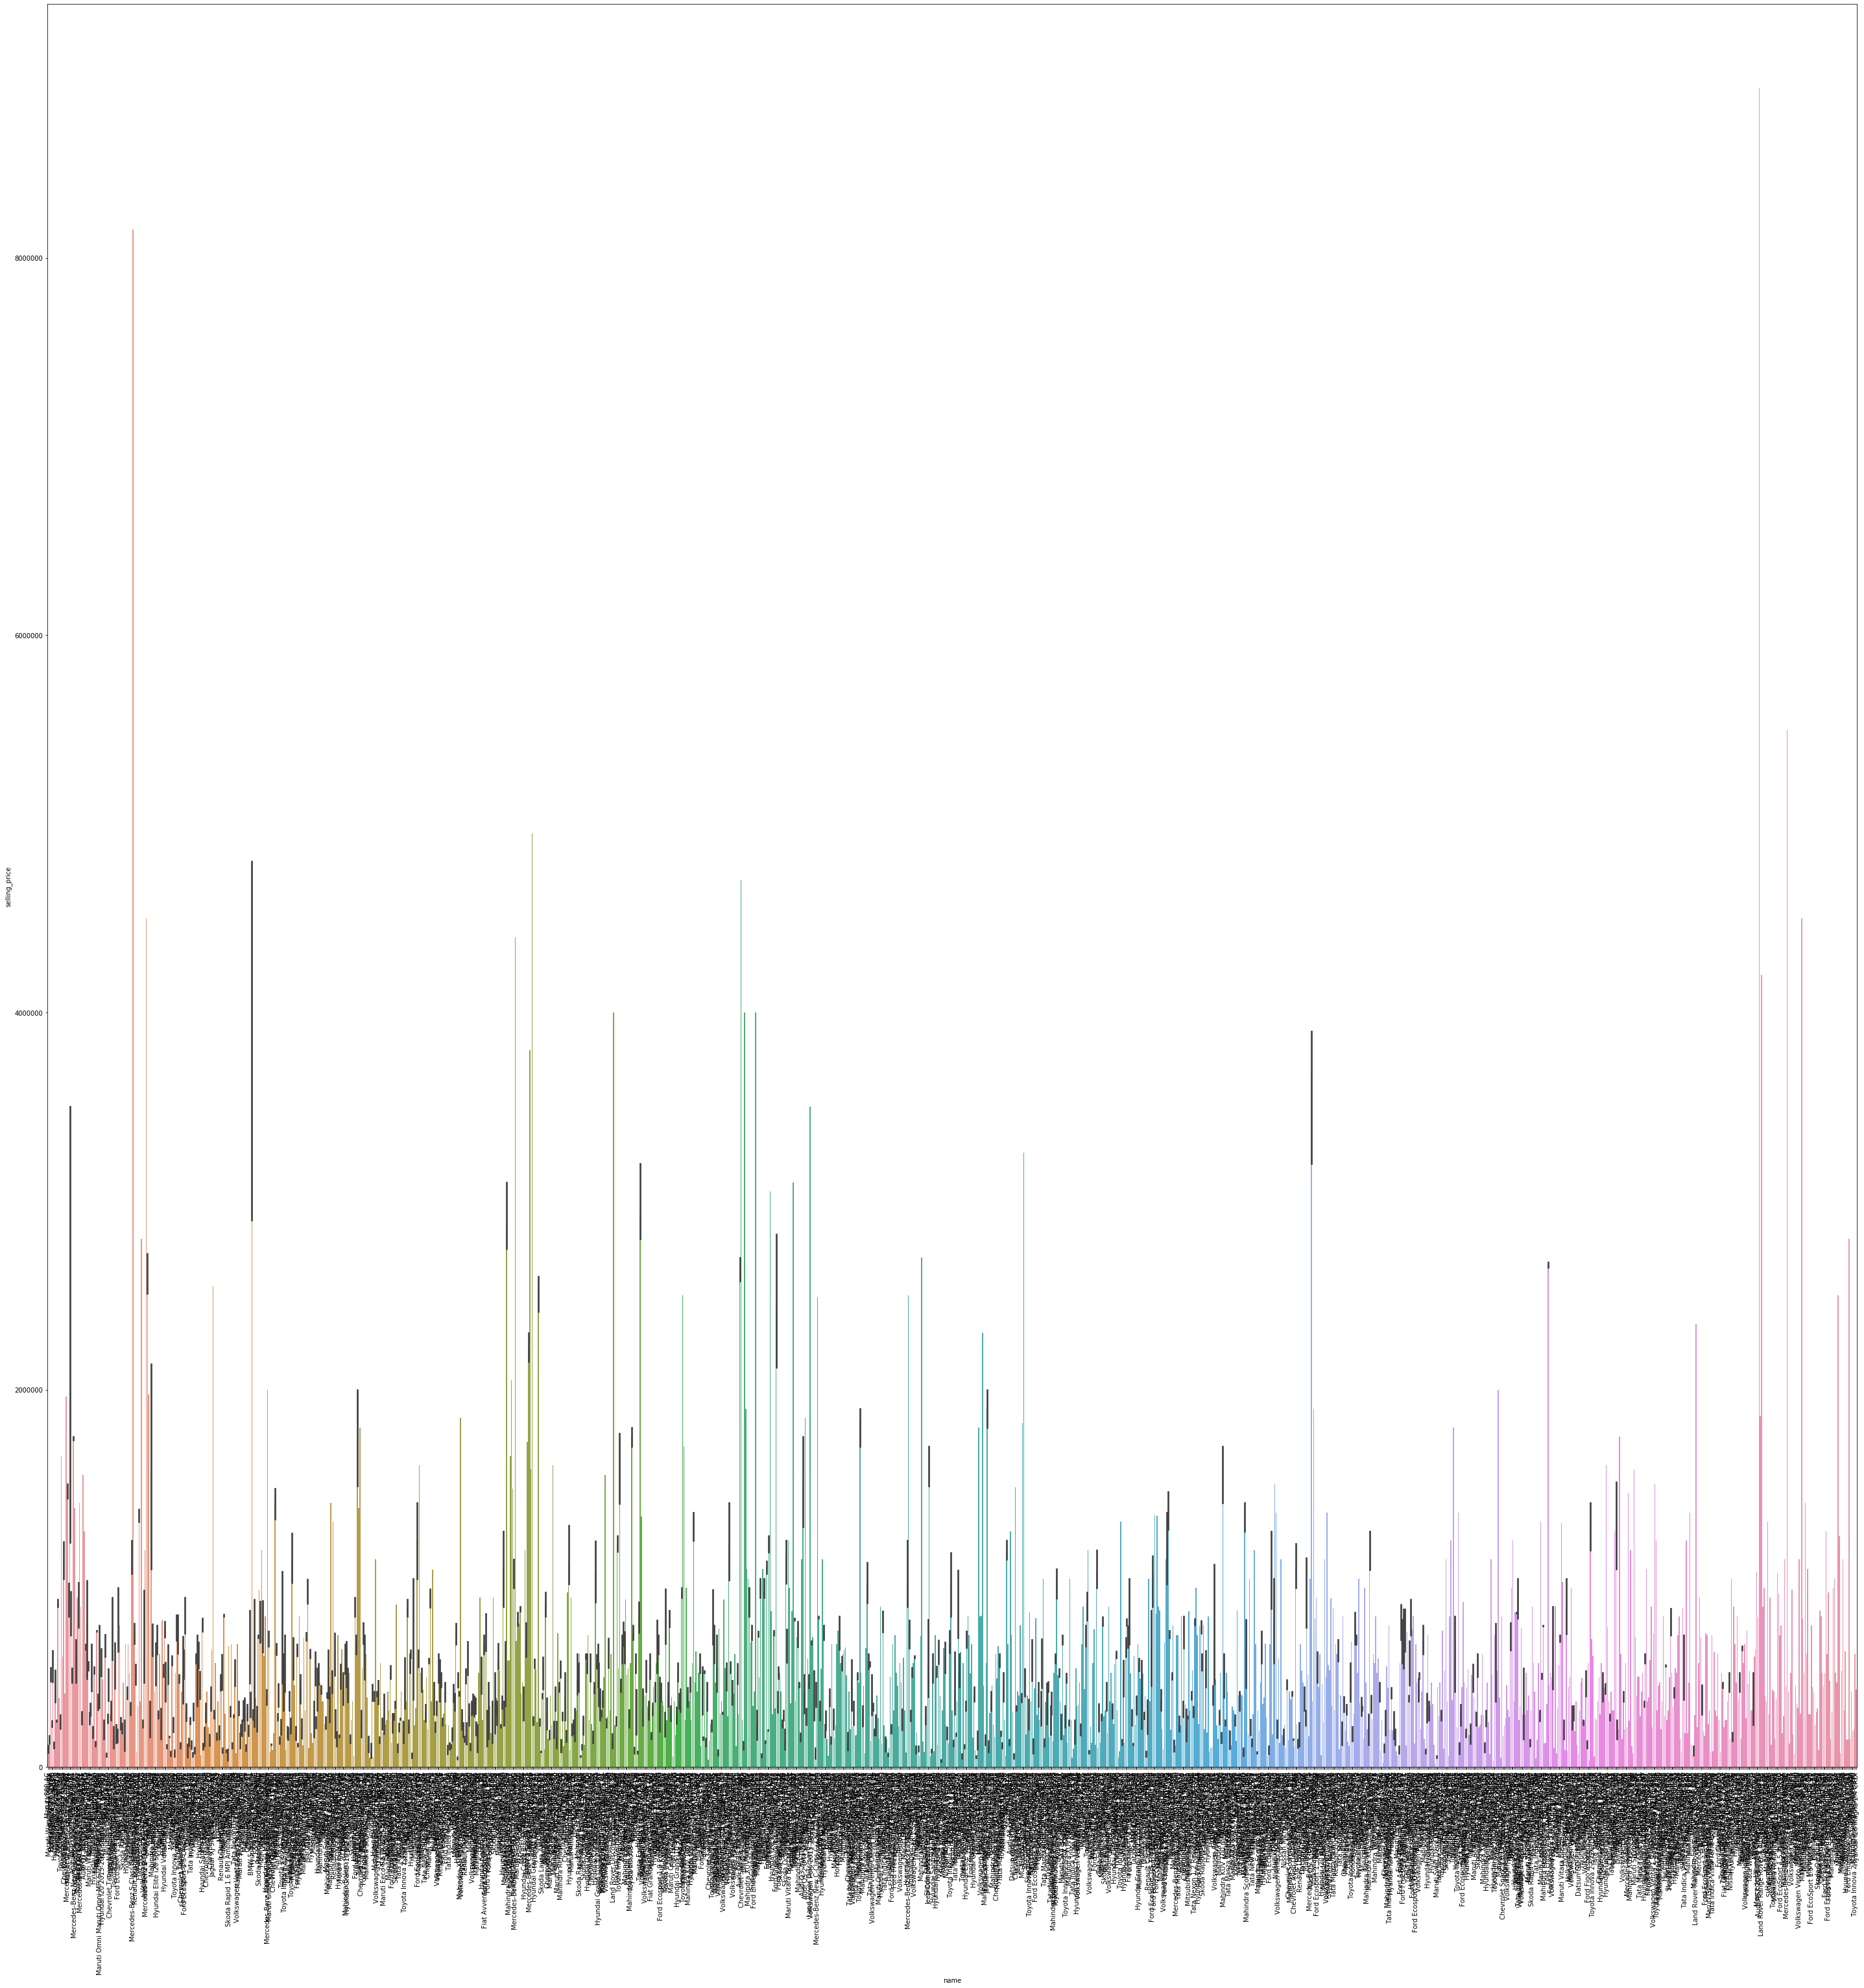

In [35]:
plt.figure(figsize=(50,50))
sns.barplot(x='name',y='selling_price',data=data)
plt.xticks(rotation=90)
plt.show()

In [36]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

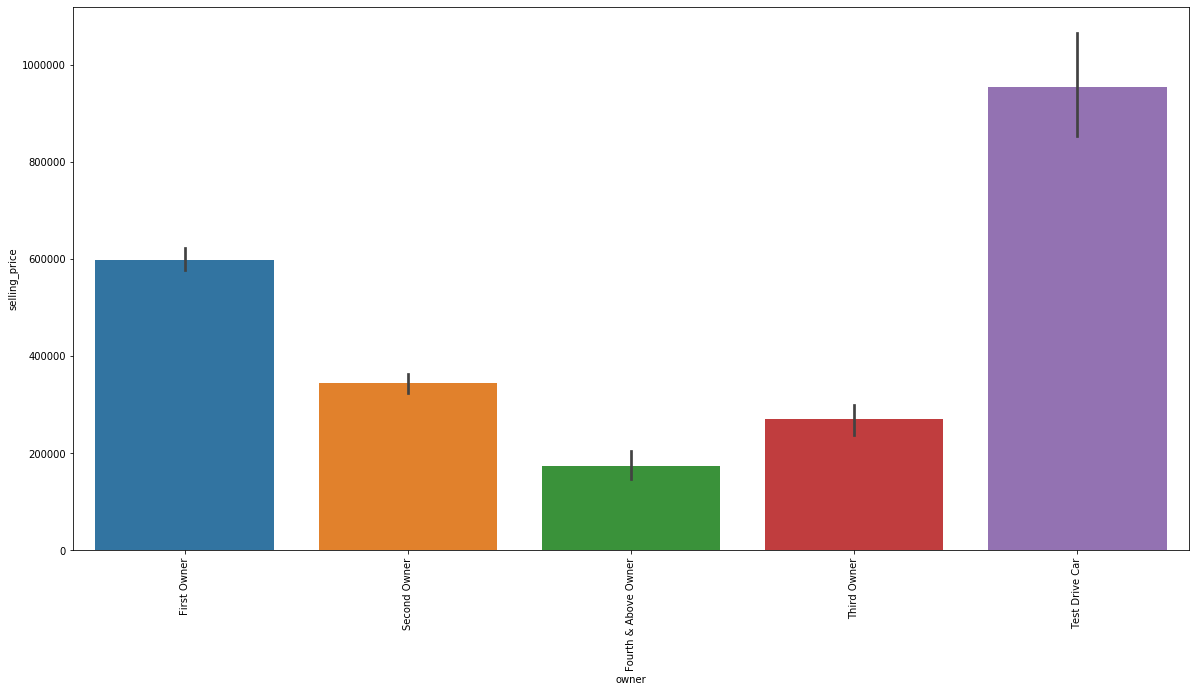

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x='owner',y='selling_price',data=data)
plt.xticks(rotation=90)
plt.show()

In [38]:
#the selling price of first owner & test drive car is high 

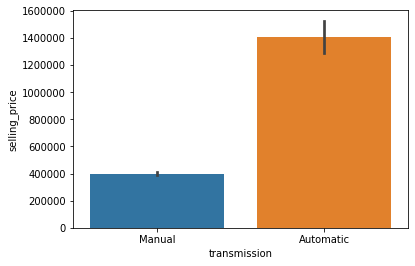

In [39]:
sns.barplot(x='transmission',y='selling_price',data=data)

In [40]:
#Without getting too technical, the main difference is that automatic 
#cars don’t have a clutch pedal.

#You also have a simplified gearbox. Manual transmission cars
#have five or six gears, plus reverse, giving you
#full control over how the car performs.

In [41]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [42]:
data['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [43]:
#diesel using cars is higher

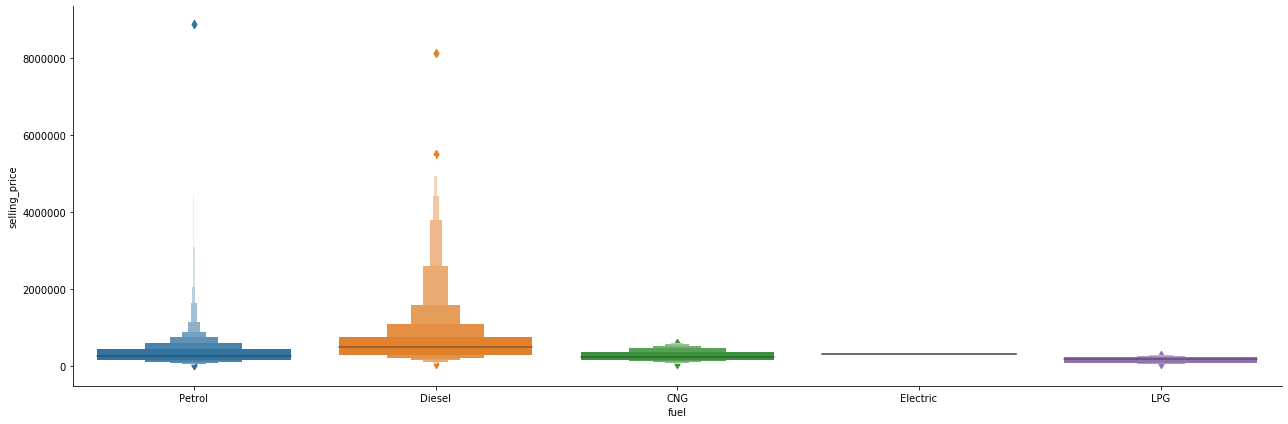

In [44]:
sns.catplot(x='fuel',y='selling_price',data=data.sort_values('selling_price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [45]:
#the price of diesel using cars is higher than others

In [46]:
#here we are using one hot encoding

In [47]:
fuel_t=data['fuel']
fuel_t=pd.get_dummies(fuel_t,drop_first=True)
fuel_t

,Diesel,Electric,LPG,Petrol
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
4335,1,0,0,0
4336,1,0,0,0
4337,0,0,0,1
4338,1,0,0,0


In [48]:
#working with transmission

In [49]:
data['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

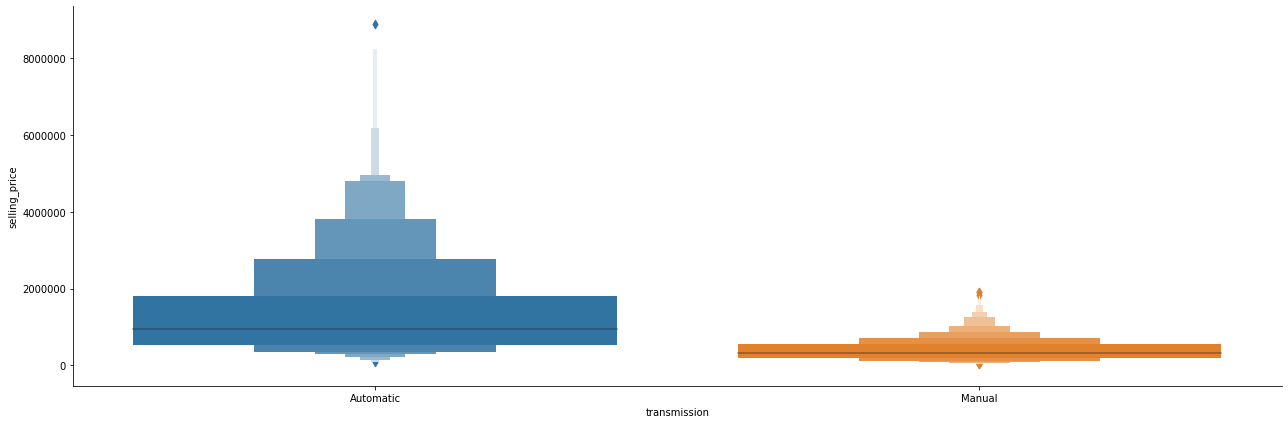

In [50]:
sns.catplot(x='transmission',y='selling_price',data=data.sort_values('selling_price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [51]:
#selling price of automatic cars is higher than manual cars

In [52]:
tran_t=data['transmission']
tran_t=pd.get_dummies(tran_t,drop_first=True)
tran_t

,Manual
0,1
1,1
2,1
3,1
4,1
...,...
4335,1
4336,1
4337,1
4338,1


In [53]:
#working with owner

In [54]:
data['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

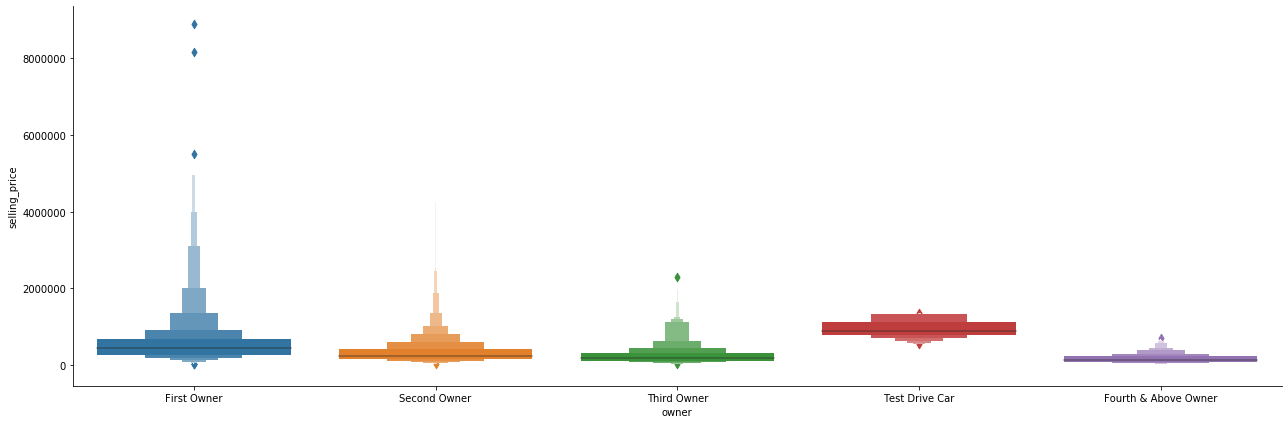

In [55]:
sns.catplot(x='owner',y='selling_price',data=data.sort_values('selling_price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [56]:
#As owner column has orderd data so we will using Label Encoding only

In [57]:
data.replace({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5},inplace=True)
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,2
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,1


In [58]:
data['owner'].unique()

array([1, 2, 4, 3, 5], dtype=int64)

In [59]:
#working with name

In [60]:
data['name'].value_counts()

Maruti Swift Dzire VDI                            69
Maruti Alto 800 LXI                               59
Maruti Alto LXi                                   47
Hyundai EON Era Plus                              35
Maruti Alto LX                                    35
                                                  ..
Skoda Laura Ambiente 2.0 TDI CR AT                 1
Maruti Alto LXi BSII                               1
Land Rover Range Rover 4.4 Diesel LWB Vogue SE     1
Land Rover Discovery Sport SD4 HSE Luxury          1
Mahindra XUV500 W11 Option AT AWD                  1
Name: name, Length: 1491, dtype: int64

<Figure size 1440x720 with 0 Axes>

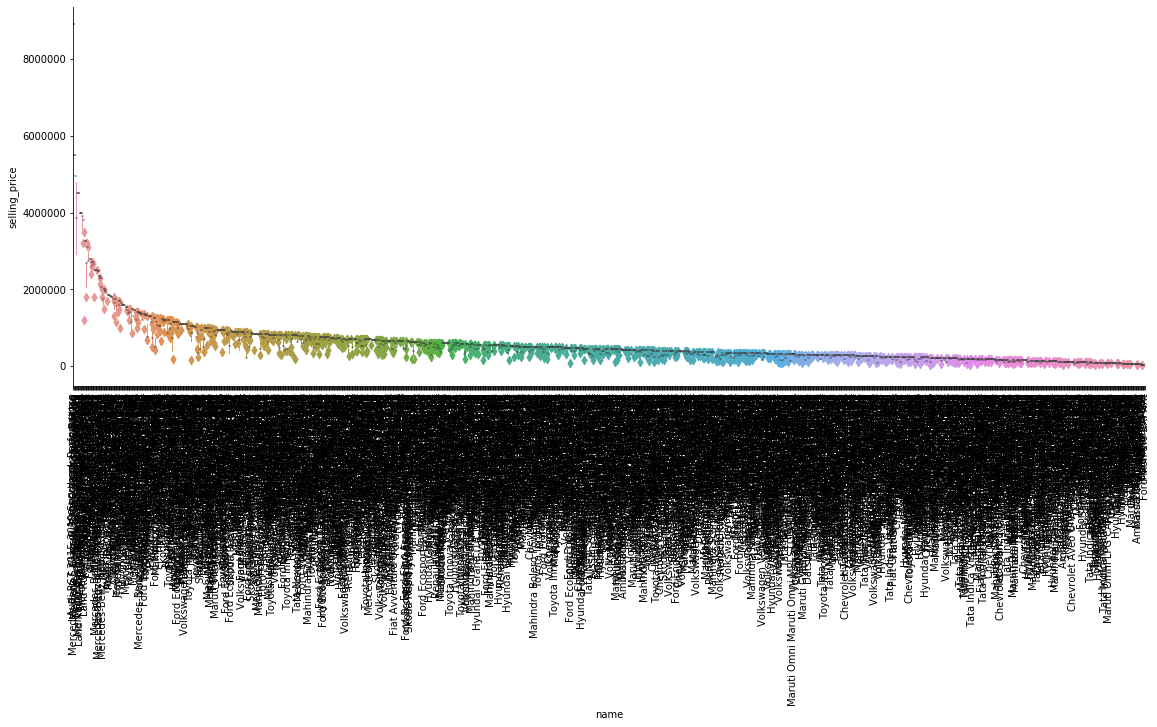

In [61]:
plt.figure(figsize=(20,10))
sns.catplot(x='name',y='selling_price',data=data.sort_values('selling_price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation=90)
plt.show()

In [62]:
#a lot of variations so lets drop name column


In [63]:
data.drop(['name'],axis=1,inplace=True)

In [64]:
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,1
1,2007,135000,50000,Petrol,Individual,Manual,1
2,2012,600000,100000,Diesel,Individual,Manual,1
3,2017,250000,46000,Petrol,Individual,Manual,1
4,2014,450000,141000,Diesel,Individual,Manual,2
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,2
4336,2014,409999,80000,Diesel,Individual,Manual,2
4337,2009,110000,83000,Petrol,Individual,Manual,2
4338,2016,865000,90000,Diesel,Individual,Manual,1


In [65]:
df=pd.concat([data,tran_t,fuel_t],axis=1)

In [66]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Manual,Diesel,Electric,LPG,Petrol
0,2007,60000,70000,Petrol,Individual,Manual,1,1,0,0,0,1
1,2007,135000,50000,Petrol,Individual,Manual,1,1,0,0,0,1
2,2012,600000,100000,Diesel,Individual,Manual,1,1,1,0,0,0
3,2017,250000,46000,Petrol,Individual,Manual,1,1,0,0,0,1
4,2014,450000,141000,Diesel,Individual,Manual,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,2,1,1,0,0,0
4336,2014,409999,80000,Diesel,Individual,Manual,2,1,1,0,0,0
4337,2009,110000,83000,Petrol,Individual,Manual,2,1,0,0,0,1
4338,2016,865000,90000,Diesel,Individual,Manual,1,1,1,0,0,0


In [67]:
df.drop(['fuel','seller_type','transmission'],axis=1,inplace=True)
#drop this variables

In [68]:
df

,year,selling_price,km_driven,owner,Manual,Diesel,Electric,LPG,Petrol
0,2007,60000,70000,1,1,0,0,0,1
1,2007,135000,50000,1,1,0,0,0,1
2,2012,600000,100000,1,1,1,0,0,0
3,2017,250000,46000,1,1,0,0,0,1
4,2014,450000,141000,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,2,1,1,0,0,0
4336,2014,409999,80000,2,1,1,0,0,0
4337,2009,110000,83000,2,1,0,0,0,1
4338,2016,865000,90000,1,1,1,0,0,0


In [69]:
df.shape

(4340, 9)

In [70]:
df.head()

,year,selling_price,km_driven,owner,Manual,Diesel,Electric,LPG,Petrol
0,2007,60000,70000,1,1,0,0,0,1
1,2007,135000,50000,1,1,0,0,0,1
2,2012,600000,100000,1,1,1,0,0,0
3,2017,250000,46000,1,1,0,0,0,1
4,2014,450000,141000,2,1,1,0,0,0


In [71]:
df.tail()

,year,selling_price,km_driven,owner,Manual,Diesel,Electric,LPG,Petrol
4335,2014,409999,80000,2,1,1,0,0,0
4336,2014,409999,80000,2,1,1,0,0,0
4337,2009,110000,83000,2,1,0,0,0,1
4338,2016,865000,90000,1,1,1,0,0,0
4339,2016,225000,40000,1,1,0,0,0,1


In [72]:
df['owner'].unique()

array([1, 2, 4, 3, 5], dtype=int64)

In [73]:
#divide the data into independent and dependent variables

In [74]:
x=df.loc[:,['year','km_driven','owner','Manual','Diesel','Electric','LPG','Petrol']]

In [75]:
x.values

array([[  2007,  70000,      1, ...,      0,      0,      1],
       [  2007,  50000,      1, ...,      0,      0,      1],
       [  2012, 100000,      1, ...,      0,      0,      0],
       ...,
       [  2009,  83000,      2, ...,      0,      0,      1],
       [  2016,  90000,      1, ...,      0,      0,      0],
       [  2016,  40000,      1, ...,      0,      0,      1]], dtype=int64)

In [76]:
y=df.loc[:,['selling_price']]

In [77]:
y.values

array([[ 60000],
       [135000],
       [600000],
       ...,
       [110000],
       [865000],
       [225000]], dtype=int64)

In [78]:
#apply the train and test split method

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.3)

In [81]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
def scaling(var):
    sc_x=StandardScaler()
    var_scale=sc_x.fit_transform(var)
    return var_scale

In [82]:
x_train=scaling(x_train)
x_test=scaling(x_test)

In [83]:
x_train,x_test

(array([[ 0.21612137, -0.58990238,  0.74603372, ...,  0.        ,
         -0.07276336,  1.03552189],
        [ 1.41512926, -1.15797446, -0.63594825, ...,  0.        ,
         -0.07276336, -0.96569663],
        [ 0.69572453, -0.27178202, -0.63594825, ...,  0.        ,
         -0.07276336, -0.96569663],
        ...,
        [-0.26348179,  0.31901294,  2.12801569, ...,  0.        ,
         -0.07276336, -0.96569663],
        [-0.02368021,  0.620841  , -0.63594825, ...,  0.        ,
         -0.07276336, -0.96569663],
        [ 1.41512926, -1.15797446,  0.74603372, ...,  0.        ,
         -0.07276336,  1.03552189]]),
 array([[ 0.90976114, -0.8000737 , -0.6193823 , ..., -0.02772435,
         -0.07352146, -1.00925946],
        [ 0.90976114, -0.29298234,  0.66679912, ..., -0.02772435,
         -0.07352146, -1.00925946],
        [ 0.67814029,  0.34805767, -0.6193823 , ..., -0.02772435,
         -0.07352146, -1.00925946],
        ...,
        [-1.869689  , -0.1303304 ,  0.66679912, ..., -

In [84]:
x_train.shape

(3038, 8)

In [85]:
x_test.shape

(1302, 8)

In [86]:
y_train.shape

(3038, 1)

In [87]:
y_test.shape

(1302, 1)

In [88]:
#fitting linear regression to the training set

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
reg=LinearRegression()

In [91]:
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
#predicting the test set results

In [93]:
y_pred=reg.predict(x_test)

In [94]:
y_pred#predicted values

array([[770844.63259236],
       [725183.17789066],
       [676604.65182474],
       ...,
       [-15606.59828567],
       [509991.73419853],
       [329382.36044682]])

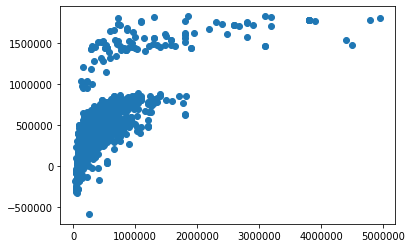

In [95]:
plt.scatter(y_test,y_pred)

In [96]:
reg.intercept_

array([505978.03982884])

In [97]:
reg.coef_

array([[ 1.53378413e+05, -5.11390460e+04, -1.53394273e+04,
        -2.73066772e+05,  1.47703016e+05,  1.45519152e-11,
         2.27483074e+03, -5.25169147e+03]])

In [98]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score

In [99]:
from math import sqrt

In [100]:
rmse=sqrt(mean_squared_error(y_test,y_pred))

In [101]:
rmse#root mean square error value

373926.9941739056

In [102]:
mae=mean_absolute_error(y_test,y_pred)
mae#mean absolute error

219161.42657565296

In [103]:
r2_score(y_test,y_pred)#accuracy 

0.5142759373497733

# Lasso Regression

In [104]:
from sklearn.linear_model import Lasso
lr=Lasso(alpha=0.2,normalize=True)#by default normalize is False
lr.fit(x_train,y_train)
lpred=lr.predict(x_test)
lpred

array([770848.05838073, 725205.01993841, 676615.32677852, ...,
       -15578.07335666, 509994.70756247, 329391.37920985])

In [105]:
lr.coef_#co_efficient values are exactly zero

array([ 153376.74622622,  -51133.06843462,  -15327.46550251,
       -273053.61192491,  148294.81995748,       0.        ,
          2349.45383913,   -4658.86409676])

In [106]:
lr.intercept_

array([505978.03982884])

In [107]:

rmse=sqrt(mean_squared_error(y_test,lpred))
rmse#root mean square error of lasso regression


373924.9030615655

In [108]:
mae=mean_absolute_error(y_test,lpred)
mae

219155.21757563975

In [109]:
from sklearn.metrics import r2_score
print(r2_score(y_test,lpred))

0.5142813699650007


# Ridge Regression


In [110]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.6,normalize=True)
rr.fit(x_train,y_train)
rpred=rr.predict(x_test)
rpred

array([[726242.98563555],
       [665987.63799246],
       [651192.86543456],
       ...,
       [124376.86150352],
       [514820.15878489],
       [384694.88998796]])

In [111]:
rr.coef_

array([[ 104450.19660168,  -44295.6952598 ,  -29384.17765318,
        -175767.42007773,   63953.31489517,       0.        ,
          -7490.71184718,  -58035.08567832]])

In [112]:
rr.intercept_

array([505978.03982884])

In [113]:
rmse=sqrt(mean_squared_error(y_test,rpred))
rmse#root mean square error of ridge regression


390217.9915023353

In [114]:
mae=mean_absolute_error(y_test,rpred)
mae

214317.00584369237

In [115]:
from sklearn.metrics import r2_score
print(r2_score(y_test,rpred))

0.4710305867860508


# Elastic Net Regression

In [116]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.5,random_state=9)
en.fit(x_train,y_train)
enpred=en.predict(x_test)
enpred

array([751938.05797239, 693818.50221726, 665700.20231185, ...,
        55275.48770029, 512080.11906139, 357477.97308029])

In [117]:
en.coef_#some values towards zero and some are exactly zero

array([ 126577.82182014,  -49576.02846647,  -25641.77931755,
       -221678.07786272,   75279.96607269,       0.        ,
         -7498.78985019,  -63983.80282356])

In [118]:
en.intercept_

array([505978.03982884])

In [119]:
print(r2_score(y_test,enpred)*100)

50.39472456200722


In [120]:
rmse=sqrt(mean_squared_error(y_test,enpred))
rmse


377881.77071297955

In [121]:
mae=mean_absolute_error(y_test,enpred)
mae

212929.42872991177